In [1]:
# Load the required libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import seaborn as sns 

import joblib 

In [2]:
# Load the required data set 

## This data is best for logistic regression, xgboost, lightgbm and other models. 
## As for catboost model we will provide the fraudTrainClean.csv dataset that is not prepprocessed by label encoding 

df = pd.read_csv("../data/preprocessed/fraudTrain.csv")
df.head()

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,1,1,0,37
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,1,1,0,47
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,1,1,0,63
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,1,1,0,58
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,1,1,0,39


**Split data into independent(X) and dependent(y) features**

In [3]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

**Split data into test and train** 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape

(1037340, 17)

In [6]:
y_test.shape

(259335,)

In [7]:
df.shape

(1296675, 18)

# Model Training

## Logistic Regression - Base Model

**Model Training**

In [8]:
# Create an instance of the model
log_reg = LogisticRegression()

# Fit the data to the model 
log_reg.fit(X_train, y_train)

/home/the-ape/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Run predictions 
y_pred = log_reg.predict(X_test)

**Model Evaluation**

In [10]:
print(f"""
Logistic Regression
------------------------------------------------
Accuracy score: {accuracy_score(y_test, y_pred)}
Precision score: {precision_score(y_test, y_pred)}
Recall score: {recall_score(y_test, y_pred)}
F1-score: {f1_score(y_test, y_pred)}
""")


Logistic Regression
------------------------------------------------
Accuracy score: 0.9939036381514258
Precision score: 0.0
Recall score: 0.0
F1-score: 0.0



*Confusion Matrix*

Text(50.722222222222214, 0.5, 'Truth')

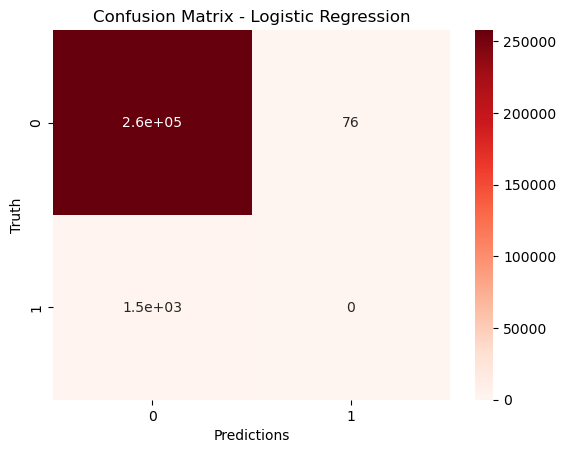

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix - Logistic Regression")
sns.heatmap(cm, cmap="Reds", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257830
           1       0.00      0.00      0.00      1505

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



Since there is an imbalance between the fraud and legit cases where above 90% percent of cases are legit, the logistic regression model performs poorly. It returns very high accuracy but low precision and recall scores.

## Random Forest Classifier

**Model Training**

In [13]:
# Create an instance of Random Forest Classifier 
rf_clf = RandomForestClassifier()

# Fit the train data to the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# run predictions 
y_pred = rf_clf.predict(X_test)

**Model Evaluation**

In [15]:
print(f"""
Random Forest Classifier
------------------------------------------------
Accuracy score: {accuracy_score(y_test, y_pred)}
Precision score: {precision_score(y_test, y_pred)}
Recall score: {recall_score(y_test, y_pred)}
F1-score: {f1_score(y_test, y_pred)}
""")


Random Forest Classifier
------------------------------------------------
Accuracy score: 0.9986272581795747
Precision score: 0.9728395061728395
Recall score: 0.7853820598006644
F1-score: 0.8691176470588236



*Confusion Matrix*

Text(50.722222222222214, 0.5, 'Truth')

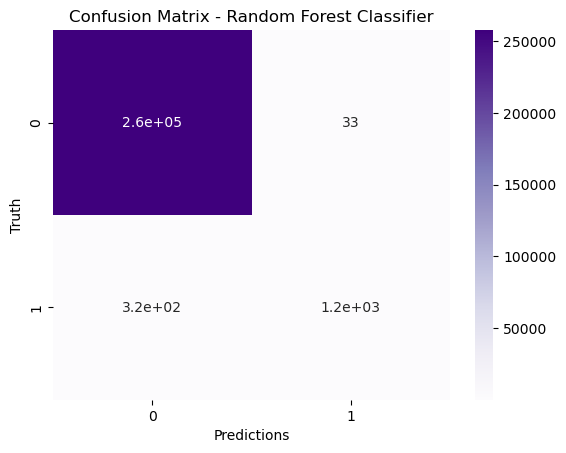

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix - Random Forest Classifier")
sns.heatmap(cm, cmap="Purples", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257830
           1       0.97      0.79      0.87      1505

    accuracy                           1.00    259335
   macro avg       0.99      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



## XGBoost Classifier

**Model Training**

In [18]:
# Create an instance of XGBoost Classifier
xgboost_clf = XGBClassifier()

# Train the model 
xgboost_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
# Run predictions using the fitted model
y_pred = xgboost_clf.predict(X_test)

**Model Evaluation**

In [20]:
print(f"""
XGBoost Classifier
------------------------------------------------
Accuracy score: {accuracy_score(y_test, y_pred)}
Precision score: {precision_score(y_test, y_pred)}
Recall score: {recall_score(y_test, y_pred)}
F1-score: {f1_score(y_test, y_pred)}
""")


XGBoost Classifier
------------------------------------------------
Accuracy score: 0.9989357394875354
Precision score: 0.9443239334779465
Recall score: 0.8677740863787375
F1-score: 0.9044321329639889



Out of all fraud cases flagged by the model on the validation dataset, 94% were correctly flagged - **Precision**

Out of all truth fraud cases, only 83% percent were flagged - **Recall**

*Confusion Matrix*

Text(50.722222222222214, 0.5, 'Truth')

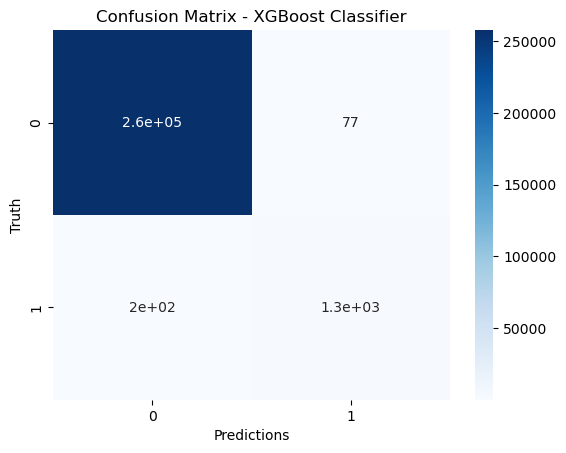

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix - XGBoost Classifier")
sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257830
           1       0.94      0.87      0.90      1505

    accuracy                           1.00    259335
   macro avg       0.97      0.93      0.95    259335
weighted avg       1.00      1.00      1.00    259335



## LightGBM Classifier

**Model Training**

In [23]:
# Create an instance of the model 
lightgbm_clf = LGBMClassifier(objective='binary', metric='binary_logloss')

# Fit the model  
lightgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6001, number of negative: 1031339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2746
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005785 -> initscore=-5.146687
[LightGBM] [Info] Start training from score -5.146687


LGBMClassifier(metric='binary_logloss', objective='binary')

In [24]:
# Run predictions on the validation dataset 
y_pred = lightgbm_clf.predict(X_test)

**Model Evaluation** - LightGBM Classifier

In [25]:
print(f"""
LightBM Classifier
------------------------------------------------
Accuracy score: {accuracy_score(y_test, y_pred)}
Precision score: {precision_score(y_test, y_pred)}
Recall score: {recall_score(y_test, y_pred)}
F1-score: {f1_score(y_test, y_pred)}
""")


LightBM Classifier
------------------------------------------------
Accuracy score: 0.9976671101085468
Precision score: 0.8065395095367848
Recall score: 0.7867109634551495
F1-score: 0.796501849983182



*Confusion Matrix*

Text(50.722222222222214, 0.5, 'Truth')

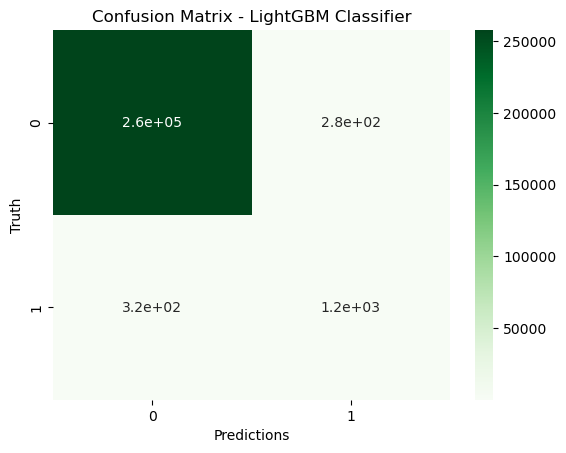

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix - LightGBM Classifier")
sns.heatmap(cm, cmap="Greens", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257830
           1       0.81      0.79      0.80      1505

    accuracy                           1.00    259335
   macro avg       0.90      0.89      0.90    259335
weighted avg       1.00      1.00      1.00    259335



## CatBoost Classifier

**Data Preparation**

Data will be prepared specifically for CatBoost Classifier
Its simple: Just split the data into train, test and validation dataset. 

i. Split the data into train and test sets 
ii. Split the train data into validation 

In this case since we have both the train and test sets, we gonna split the train into train and validations 

In [28]:
# Split the original data set into train and validation
X_TRAIN, X_val, y_TRAIN, y_val = train_test_split(X_train, y_train, test_size=0.2)

**Model Training**

In [29]:
# Create an instance of the model 
catBoost_clf = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'Precision', 'Recall']
)

# Define categorical features from the dataset
cat_features = ["category", "gender", "street", 
                "city", "state", "job", 
                "trans_month", "trans_day", "trans_hour"
               ]

# Train the model
catBoost_clf.fit(
    X_TRAIN, y_TRAIN,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [30]:
# Run predictions on the validation dataset 
y_pred = catBoost_clf.predict(X_test)

**Model Evaluation**

In [31]:
print(f"""
CatBoost Classifier
------------------------------------------------
Accuracy score: {accuracy_score(y_test, y_pred)}
Precision score: {precision_score(y_test, y_pred)}
Recall score: {recall_score(y_test, y_pred)}
F1-score: {f1_score(y_test, y_pred)}
""")


CatBoost Classifier
------------------------------------------------
Accuracy score: 0.9997339348718839
Precision score: 0.979305740987984
Recall score: 0.9747508305647841
F1-score: 0.977022977022977



*Confusion Matrix*

Text(50.722222222222214, 0.5, 'Truth')

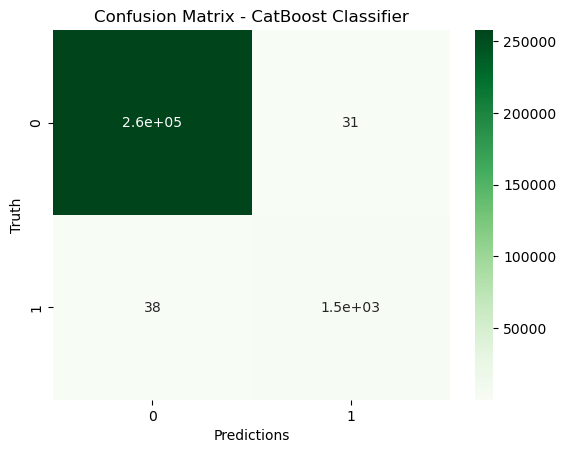

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix - CatBoost Classifier")
sns.heatmap(cm, cmap="Greens", annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257830
           1       0.98      0.97      0.98      1505

    accuracy                           1.00    259335
   macro avg       0.99      0.99      0.99    259335
weighted avg       1.00      1.00      1.00    259335



# Results 

From the training and evaluation, XGBoost and CatBoost Classifier(1000 iterations)  Models performed the best. The model will be saved for SHAPE & LIME explainability and further

In [35]:
#### Save
joblib.dump(xgboost_clf, '../models/XGBoost_model.joblib')
joblib.dump(catBoost_clf, '../models/catBoost_model.joblib')

# Below code will be referenced when loading the model 
# loaded_model = joblib.load('filename.joblib')

['../models/catBoost_model.joblib']

## PyCaret Classification - Find how to use it!